In [1]:
from Visualisations import *

# Default of Credit Card Clients Dataset — Column Dictionary

| Column Name                  | Description                                       | Possible Values                                             |
|------------------------------|-------------------------------------------------|-------------------------------------------------------------|
| `ID`                         | Client ID (row number)                           | 1, 2, 3, …                                                 |
| `LIMIT_BAL`                  | Amount of given credit (NT dollar)               | Continuous                                                 |
| `SEX`                       | Gender                                           | 1 = Male, 2 = Female                                        |
| `EDUCATION`                 | Education level                                  | 1 = Graduate School<br>2 = University<br>3 = High School<br>4 = Others |
| `MARRIAGE`                  | Marital status                                  | 1 = Married<br>2 = Single<br>3 = Others                      |
| `AGE`                       | Age in years                                    | Integer (21–79)                                              |
| `PAY_6`   - `PAY_0`         | Repayment status from **Apr - Sep 2005**        | -2 = No consumption<br>-1 = Paid in full<br>0 = Paid minimum due / revolving credit<br>1 = 1 month delay<br>2 = 2 months delay<br>…<br>8 = 8+ months delay |
| `BILL_AMT_6` - `BILL_AMT1`  | Amount of bill statement from **Apr - Sep 2005**  | Continuous                                                 |
| `PAY_AMT6`  - `PAY_AMT1`    | Amount paid in **Apr - Sep 2005**                | Continuous                                                  |
| `DEFAULT`                   | Default status in **October 2005** (target)     | 1 = Yes (defaulted)<br>0 = No (non-defaulted)                |

---

**Notes:**

- *NT dollar* = New Taiwan Dollar  
- `PAY_0` to `PAY_6` represent payment status for the previous six months  
- Target variable `default payment next month` is binary by default but can be extended for multinomial classification by deriving risk bands from repayment status


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

defaults = fetch_ucirepo(id=350)

# Get the feature columns
X = defaults.data.features

# Get the target column
y = defaults.data.targets

# Create a dataframe of the features and target variables
defaults_df = pd.concat([X, y], axis=1)

In [3]:
defaults_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
feature_names = [
    'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
    'SEP_STATUS', 'AUG_STATUS', 'JUL_STATUS', 'JUN_STATUS', 'MAY_STATUS', 'APR_STATUS',
    'SEP_BILL', 'AUG_BILL', 'JUL_BILL', 'JUN_BILL', 'MAY_BILL', 'APR_BILL',
    'SEP_PAYMENT', 'AUG_PAYMENT', 'JUL_PAYMENT', 'JUN_PAYMENT', 'MAY_PAYMENT', 'APR_PAYMENT',
    'DEFAULT'
]

defaults_df.columns = feature_names

In [5]:
def classify_risk(row):
    max_status = row[['APR_STATUS', 'MAY_STATUS', 'JUN_STATUS', 'JUL_STATUS', 'AUG_STATUS', 'SEP_STATUS']].max()
    if max_status <= 0:
        return 'Low Risk'
    elif max_status <= 2:
        return 'Medium Risk'
    else:
        return 'High Risk'

In [6]:
defaults_df['RISK'] = defaults_df.apply(classify_risk, axis=1)

In [7]:
defaults_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,SEP_STATUS,AUG_STATUS,JUL_STATUS,JUN_STATUS,MAY_STATUS,...,MAY_BILL,APR_BILL,SEP_PAYMENT,AUG_PAYMENT,JUL_PAYMENT,JUN_PAYMENT,MAY_PAYMENT,APR_PAYMENT,DEFAULT,RISK
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,Medium Risk
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,Medium Risk
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,Low Risk
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,Low Risk
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,Low Risk
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,5190,0,1837,3526,8998,129,0,0,0,Low Risk
29997,30000,1,2,2,37,4,3,2,-1,0,...,20582,19357,0,0,22000,4200,2000,3100,1,High Risk
29998,80000,1,3,1,41,1,-1,0,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,Medium Risk


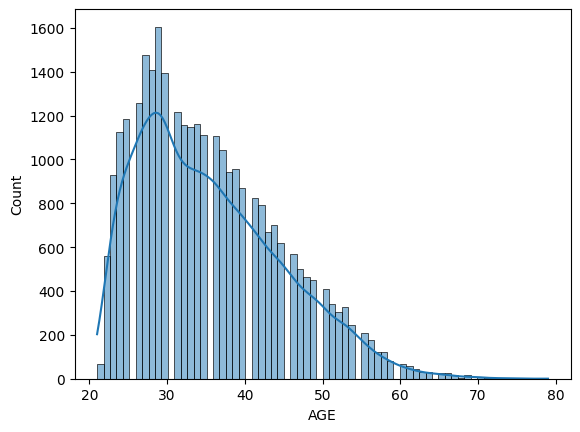

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(defaults_df['AGE'], kde=True)
plt.show()


In [41]:
# Create faceted histogram with 'sex' as facet variable
fig = px.histogram(
    defaults_df, 
    x='LIMIT_BAL', 
    color='DEFAULT', 
    facet_col="RISK", 
    nbins=20, 
    opacity=0.75, 
    title="Total Bill Distribution by Sex"
)

fig.update_layout(bargap=0.1)
fig.show()

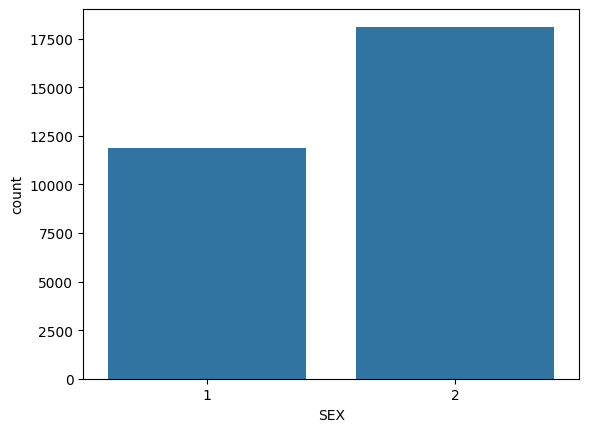

In [9]:
sns.countplot(x='SEX', data=defaults_df)
plt.show()


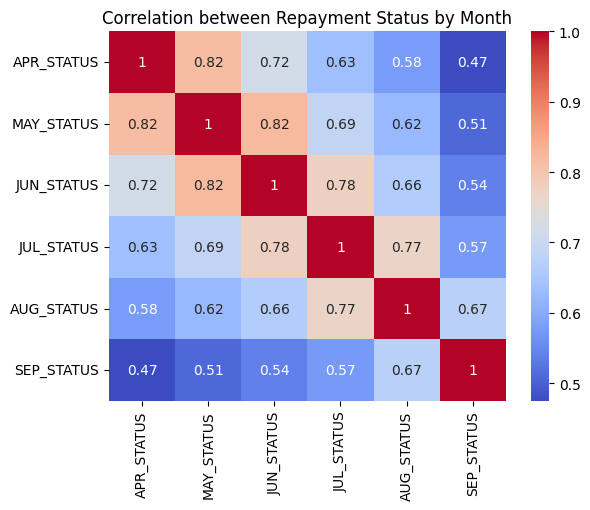

In [10]:
status_cols = ['APR_STATUS', 'MAY_STATUS', 'JUN_STATUS', 'JUL_STATUS', 'AUG_STATUS', 'SEP_STATUS']
sns.heatmap(defaults_df[status_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Repayment Status by Month')
plt.show()


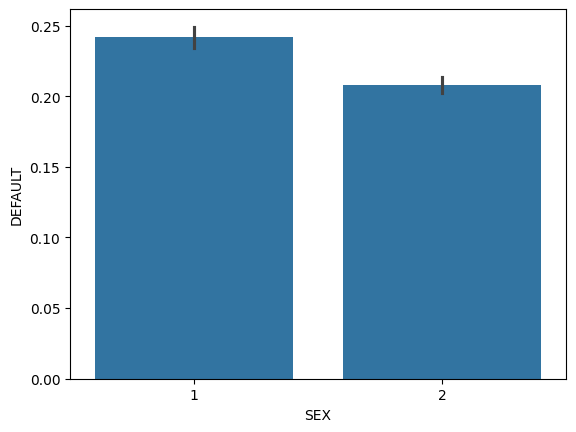

In [11]:
sns.barplot(x='SEX', y='DEFAULT', data=defaults_df)
plt.show()


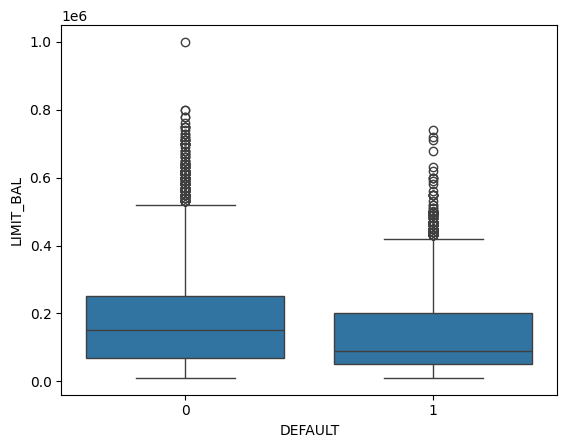

In [12]:
sns.boxplot(x='DEFAULT', y='LIMIT_BAL', data=defaults_df)
plt.show()


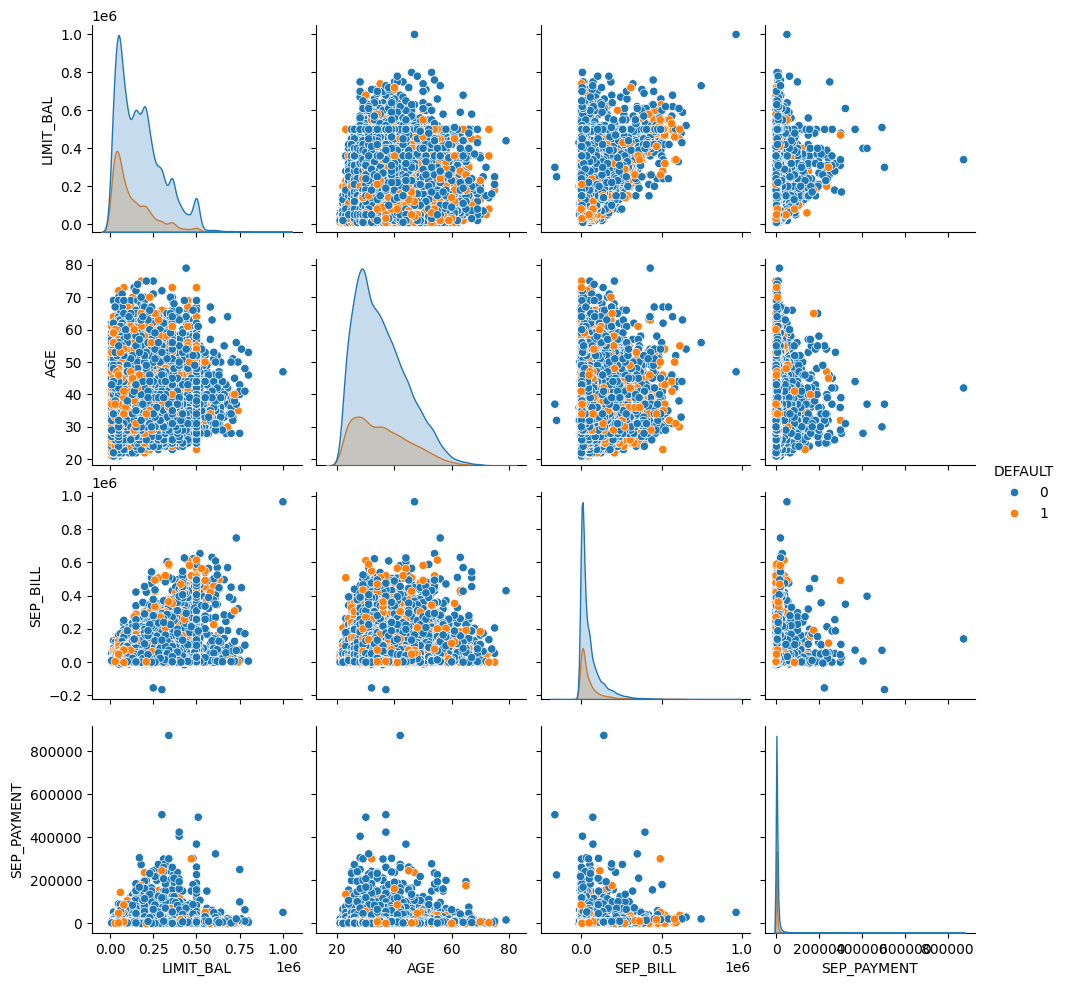

In [13]:
sns.pairplot(defaults_df, vars=['LIMIT_BAL', 'AGE', 'SEP_BILL', 'SEP_PAYMENT'], hue='DEFAULT', )
plt.show()


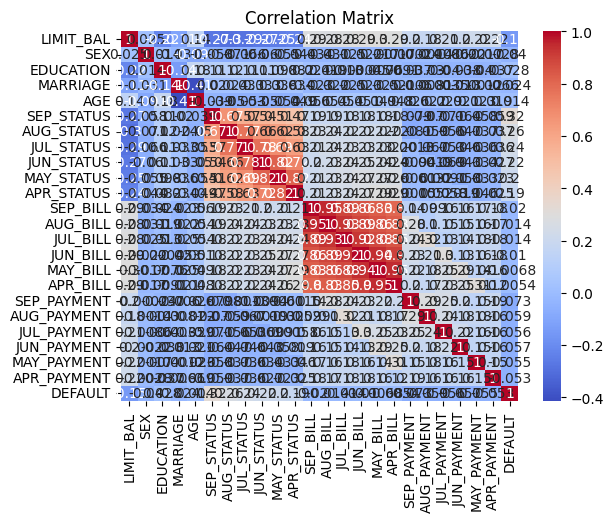

In [14]:
import numpy as np

corr = defaults_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


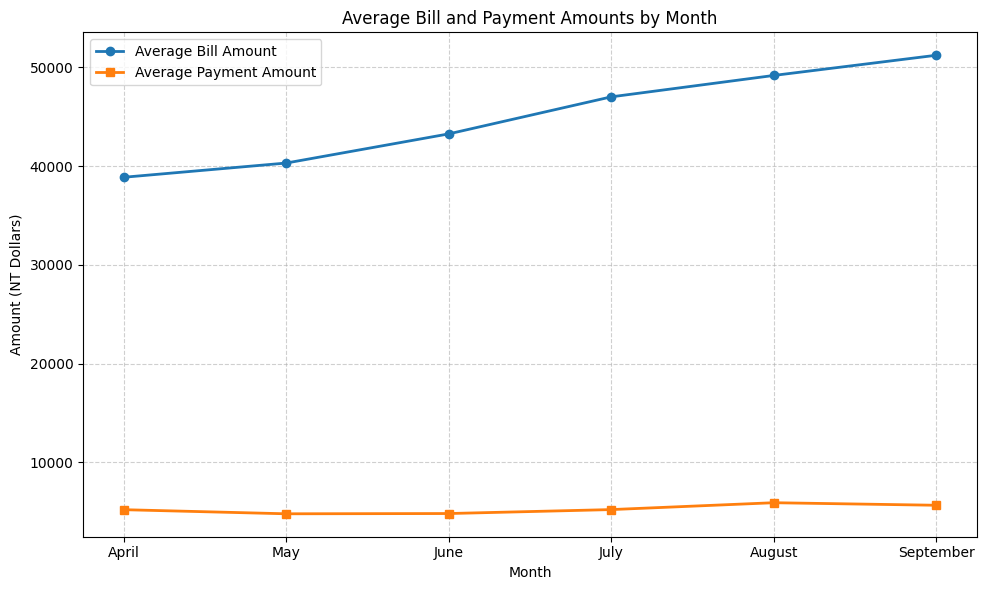

In [15]:
import matplotlib.pyplot as plt

# List of bill and payment columns
bill_cols = ['APR_BILL', 'MAY_BILL', 'JUN_BILL', 'JUL_BILL', 'AUG_BILL', 'SEP_BILL']
payment_cols = ['APR_PAYMENT', 'MAY_PAYMENT', 'JUN_PAYMENT', 'JUL_PAYMENT', 'AUG_PAYMENT', 'SEP_PAYMENT']

# Calculate averages
avg_bills = defaults_df[bill_cols].mean()
avg_payments = defaults_df[payment_cols].mean()

# X-axis labels (months)
months = ['April', 'May', 'June', 'July', 'August', 'September']

# Plot
plt.figure(figsize=(10,6))
plt.plot(months, avg_bills, marker='o', label='Average Bill Amount', linewidth=2)
plt.plot(months, avg_payments, marker='s', label='Average Payment Amount', linewidth=2)

plt.title('Average Bill and Payment Amounts by Month')
plt.ylabel('Amount (NT Dollars)')
plt.xlabel('Month')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



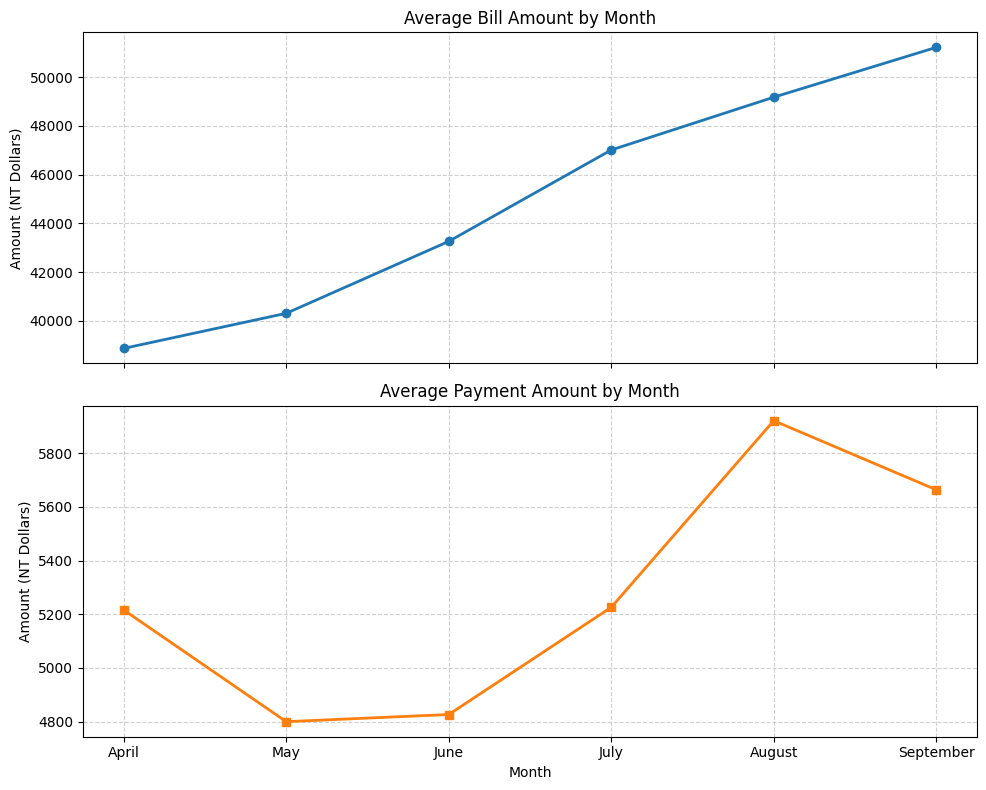

In [16]:
import matplotlib.pyplot as plt

bill_cols = ['APR_BILL', 'MAY_BILL', 'JUN_BILL', 'JUL_BILL', 'AUG_BILL', 'SEP_BILL']
payment_cols = ['APR_PAYMENT', 'MAY_PAYMENT', 'JUN_PAYMENT', 'JUL_PAYMENT', 'AUG_PAYMENT', 'SEP_PAYMENT']

avg_bills = defaults_df[bill_cols].mean()
avg_payments = defaults_df[payment_cols].mean()

months = ['April', 'May', 'June', 'July', 'August', 'September']

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot average bill amounts
axs[0].plot(months, avg_bills, marker='o', color='tab:blue', linewidth=2)
axs[0].set_title('Average Bill Amount by Month')
axs[0].set_ylabel('Amount (NT Dollars)')
axs[0].grid(True, linestyle='--', alpha=0.6)

# Plot average payment amounts
axs[1].plot(months, avg_payments, marker='s', color='tab:orange', linewidth=2)
axs[1].set_title('Average Payment Amount by Month')
axs[1].set_ylabel('Amount (NT Dollars)')
axs[1].set_xlabel('Month')
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

# Features DataFrame
features = data.data

# Target Series
target = data.target

# Combine features and target into one DataFrame
housing_df = features.copy()          # copy features to avoid modifying original
housing_df['MedHouseVal'] = target    # add target as a new column


In [18]:
# Add a column for actual median house value in dollars
housing_df['Median_Val'] = round(housing_df['MedHouseVal'] * 100000, 0)


In [20]:
import geopandas as gpd

# Load US States shapefile (from Natural Earth or US Census Bureau)
# You can download from: https://www2.census.gov/geo/tiger/GENZ2022/shp/
states = gpd.read_file("cb_2022_us_state_20m/cb_2022_us_state_20m.shp")

# Filter for California and neighboring states
west_states = states[states['STUSPS'].isin(['CA', 'OR', 'NV', 'AZ'])]

# Convert housing data into GeoDataFrame
gdf = gpd.GeoDataFrame(
    housing_df, 
    geometry=gpd.points_from_xy(housing_df['Longitude'], housing_df['Latitude']),
    crs="EPSG:4326"
)


[Interactive California Heatmap Plotly](https://mickeyadd.github.io/my_risk_toolkit/Machine%20Learning%20Notes/Classification%20Models/california_house_values_heatmap_plotly.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Simulate dummy data
np.random.seed(0)
X = np.array([[1], [2], [3]])  # single feature, 3 points
y = np.array([0, 1, 2])        # 3 categories

X = X.flatten()

In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)

def log_likelihood(beta1, beta2):
    ll = 0
    for i in range(len(X)):
        z = np.array([beta1 * X[i], beta2 * X[i], 0])  # 3 classes, fix beta3 = 0 for identifiability
        p = softmax(z)
        ll += np.log(p[y[i]])
    return ll

In [ ]:
beta1_vals = np.linspace(-5, 5, 100)
beta2_vals = np.linspace(-5, 5, 100)

B1, B2 = np.meshgrid(beta1_vals, beta2_vals)

# Vectorize your log_likelihood function
vectorized_ll = np.vectorize(log_likelihood)

# Apply to grid
LL = vectorized_ll(B1, B2)

In [ ]:
# Get index of maximum log-likelihood
max_idx = np.unravel_index(np.argmax(LL), LL.shape)

# Get corresponding beta values
beta1_mle = B1[max_idx]
beta2_mle = B2[max_idx]

print(f'MLE at β₁ = {beta1_mle}, β₂ = {beta2_mle}')


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Contour plot
fig.add_trace(go.Contour(
    z=LL,
    x=beta1_vals,
    y=beta2_vals,
    colorscale='Viridis',
    contours=dict(coloring='fill'),
    colorbar=dict(title='Log-Likelihood')
))

# MLE marker
fig.add_trace(go.Scatter(
    x=[beta1_mle],
    y=[beta2_mle],
    mode='markers+text',
    marker=dict(color='red', size=10, symbol='x'),
    text=[f'MLE<br>({beta1_mle:.2f}, {beta2_mle:.2f})'],
    textposition='top center',
    name='MLE'
))

fig.update_layout(
    title='Joint Log-Likelihood Surface with MLE',
    xaxis_title=r'β₁',
    yaxis_title=r'β₂',
    width=800,
    height=600
)

fig.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go

def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)

# Create grid of z1 and z2
z1 = np.linspace(-5, 5, 100)
z2 = np.linspace(-5, 5, 100)
Z1, Z2 = np.meshgrid(z1, z2)

# Compute softmax probability for Class 1 on the grid
P1 = np.zeros_like(Z1)

for i in range(Z1.shape[0]):
    for j in range(Z1.shape[1]):
        z = np.array([Z1[i, j], Z2[i, j], 0])
        P1[i, j] = softmax(z)[0]

# Create Plotly surface plot
fig = go.Figure(data=[go.Surface(z=P1, x=Z1, y=Z2, colorscale='Viridis')])

fig.update_layout(
    title='Softmax Probability Surface for Class 1',
    scene=dict(
        xaxis_title='z1',
        yaxis_title='z2',
        zaxis_title='P(Class 1)'
    ),
    width=900,
    height=700,
    autosize=False
)

fig.show()